# Agent


![Screenshot 2024-08-21 at 12.44.33 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbac0ba0bd34b541c448cc_agent1.png)



![Screenshot 2024-08-21 at 12.45.43 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbac0b4a2c1e5e02f3e78b_agent2.png)

In [1]:
from langchain_ollama.chat_models import ChatOllama

llm = ChatOllama(model="llama3-groq-tool-use",temrepture=0)
llm.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', response_metadata={'model': 'llama3-groq-tool-use', 'created_at': '2024-09-16T18:45:51.775222316Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 3893319349, 'load_duration': 3500384239, 'prompt_eval_count': 11, 'prompt_eval_duration': 47991000, 'eval_count': 10, 'eval_duration': 300075000}, id='run-064895a3-71c3-459c-9942-9fc6c42a4968-0', usage_metadata={'input_tokens': 11, 'output_tokens': 10, 'total_tokens': 21})

In [3]:
def multiply(a: int, b: int): 
    """ multiply tool takes in two numbers and multiplies them 
    Args: 
        a : int
        b : int
    Returns: 
        a * b
    """
    return a * b

def divide(a: int, b: int): 
    """ add tool takes in two numbers and divides them 
    Args: 
        a : int
        b : int
    Returns: 
        a / b
    """
    return a + b
def add(a: int, b: int): 
    """ add tool takes in two numbers and adds them 
    Args: 
        a : int
        b : int
    Returns: 
        a + b
    """
    return a + b

In [7]:
llm_with_tools = llm.bind_tools([add,multiply,divide])
call = llm_with_tools.invoke("add 1 and 3 ")
call.tool_calls

[{'name': 'add',
  'args': {'a': 1, 'b': 3},
  'id': 'a0f0d5a4-b569-4975-8cda-437570f885a3',
  'type': 'tool_call'}]

In [23]:
from langgraph.graph import MessagesState
from langchain_core.messages import SystemMessage

sys_message = SystemMessage(content="your an AI Math assistant coupled with tools to solve math for me")

def tool_selector(state: MessagesState): 
    return {"messages": state["messages"] + llm_with_tools.invoke(sys_message+ state["messages"])}

In [24]:
from langgraph.graph import MessageGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

bulider = MessageGraph()
bulider.add_node("tool_selector",tool_selector)
bulider.add_node("tools",ToolNode([add,multiply,divide]))

bulider.add_edge(START, "tool_selector")
bulider.add_conditional_edges("tool_selector",tools_condition)
bulider.add_edge("tools","tool_selector")

In [25]:
agent = bulider.compile()

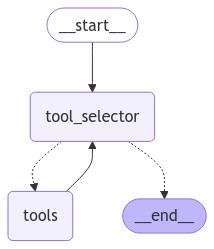

In [26]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [27]:
agent.invoke("add 5 to 3 after that multiply the result by 2 and finally divide it by 4")

ValueError: Invalid input type <class 'langchain_core.prompts.chat.ChatPromptTemplate'>. Must be a PromptValue, str, or list of BaseMessages.

In [30]:
from langgraph.prebuilt import create_react_agent
agent = create_react_agent(llm_with_tools,[add,multiply,divide])

In [34]:
agent.invoke({"messages": "add 5 to 3 after that multiply the result by 2 and finally divide it by 4"})

{'messages': [HumanMessage(content='add 5 to 3 after that multiply the result by 2 and finally divide it by 4', id='a903b21f-a813-4381-a6d0-296c79608bac'),
  AIMessage(content='', response_metadata={'model': 'llama3-groq-tool-use', 'created_at': '2024-09-16T19:13:36.124877235Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'add', 'arguments': {'a': 5, 'b': 3}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 1408159515, 'load_duration': 22246674, 'prompt_eval_count': 348, 'prompt_eval_duration': 345513000, 'eval_count': 31, 'eval_duration': 995609000}, id='run-f6f83a16-cbf3-4ac4-b30a-4791928a1a07-0', tool_calls=[{'name': 'add', 'args': {'a': 5, 'b': 3}, 'id': '6c287110-8b6b-4ee3-9a7c-c3d15adeaf8d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 348, 'output_tokens': 31, 'total_tokens': 379}),
  ToolMessage(content='8', name='add', id='2e83f06c-1340-442e-82bb-8900be817327', tool_call_id='6c287110-8b6b-4ee3-9a7c-c3d15adeaf8d'),
  